# Sampling for experiment 2: impact of intersection layout (Section 5.1)

In [1]:
import sys
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Patch
from matplotlib.collections import PatchCollection
import matplotlib as mpl
mpl.rc('font',family='Arial')
from shapely.geometry import Point, Polygon
from IPython.display import display, clear_output
sys.path.append('MapVis/python')
import main_visualize_data as vs
import warnings
warnings.filterwarnings('ignore')

parent_dir = r'U:/Vehicle Coordination Yiru' # Set your parent directory here. 

## Functions

In [2]:
def angle(vec1x, vec1y, vec2x, vec2y):
    sin = vec1x * vec2y - vec2x * vec1y  
    cos = vec1x * vec2x + vec1y * vec2y
    return -np.arctan2(sin, cos) * (180 / np.pi)

def cortrans(xyaxis, yyaxis, x2t, y2t):
    x = yyaxis/np.sqrt(xyaxis**2+yyaxis**2)*x2t-xyaxis/np.sqrt(xyaxis**2+yyaxis**2)*y2t
    y = xyaxis/np.sqrt(xyaxis**2+yyaxis**2)*x2t+yyaxis/np.sqrt(xyaxis**2+yyaxis**2)*y2t
    return x, y

def Grouping(samples, vehnum):
    samples = samples.sort_values(by='v')
    samples['round_v'] = np.round(samples.v,1)
    groups = samples.groupby('round_v').x.count()
    try:
        threshold = groups[groups>=vehnum].index[-1]
        sample1 = []
        for roundv in samples[samples.round_v<=threshold].round_v.unique():
            clear_output(wait=True)
            print('--- '+str(roundv)+' ----')
            sample = samples[samples.round_v==roundv]
            if len(sample)>vehnum:
                sample = sample.loc[np.random.choice(sample.index.values, vehnum)]
            sample1.append(sample)
        sample1 = pd.concat(sample1)
    except:
        threshold = 0
        sample1 = samples[samples.round_v<0].copy()
    sample2 = samples[samples.round_v>threshold].copy()
    sample2['round_v'] = np.arange(len(sample2))//vehnum
    sample2['round_v'] = (np.round(sample2.groupby('round_v').v.mean(),1)).reindex(sample2.round_v).values
    samples = pd.concat((sample1, sample2))

    return samples

## Read raw data

In [3]:
loc = 'DR_USA_Intersection_GL'
data_files = sorted(glob.glob(r'U:/Vehicle Coordination Yiru/RawDatasets/INTERACTION/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/' + loc + '/vehicle*.csv'))

for data_file in tqdm(data_files):
    data = pd.read_csv(data_file)
    data['hx'] = np.cos(data.psi_rad)
    data['hy'] = np.sin(data.psi_rad)    
    data.to_hdf(parent_dir + '/InputData/INTERACTION/' + loc + '/' + data_file[-22:-3] + 'h5', key='data')

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████| 60/60 [00:33<00:00,  1.78it/s]


In [4]:
x_min,x_max,y_min,y_max = [data.x.min(), data.x.max(), data.y.min(), data.y.max()]

## Road segmentation

In [5]:
def createfig(t):
    fig, ax = plt.subplots(figsize=(16,6))

    lines = vs.draw_map(ax, 'DR_USA_Intersection_GL', xlim=[x_min-5, x_max+5], ylim=[y_min-5, y_max+5])
    # ax.set_title('t = '+str(t/10)+' s')
    ax.set(aspect='equal')
    ax.set_xlabel('Global '+r'$x$'+' coordinate (m)')
    ax.set_ylabel('Global '+r'$y$'+' coordinate (m)')

    return fig, ax, lines

def plotpolygon(xlist, ylist):
    for i in range(len(xlist)):
        plt.plot(xlist[i], ylist[i])
        plt.text(xlist[i][0], ylist[i][0], str(i))
        plt.gca().set_aspect('equal')

_, _, lines = createfig(0)
x_lists, y_lists, _ = lines
plt.close()

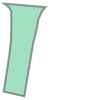

In [6]:
x = []
y = []

x.append(x_lists[15][4:][::-1])
y.append(y_lists[15][4:][::-1])

x.append(x_lists[21])
y.append(y_lists[21])

x.append(x_lists[16])
y.append(y_lists[16])

xlist, ylist = (x,y)
# plotpolygon(xlist, ylist)

outmidright = Polygon(np.array([[e for x in xlist for e in x], [e for x in ylist for e in x]]).T)
outmidright

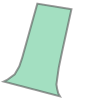

In [7]:
x = []
y = []

x.append(x_lists[12][:-5])
y.append(y_lists[12][:-5])

x.append(x_lists[7][::-1])
y.append(y_lists[7][::-1])

x.append(x_lists[6][:-3][::-1])
y.append(y_lists[6][:-3][::-1])

xlist, ylist = (x,y)
# plotpolygon(xlist, ylist)

inmidright = Polygon(np.array([[e for x in xlist for e in x], [e for x in ylist for e in x]]).T)
inmidright

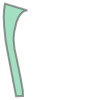

In [8]:
x = []
y = []

x.append(x_lists[8])
y.append(y_lists[8])

x.append(x_lists[15][:4])
y.append(y_lists[15][:4])

x.append([(x_lists[2][-1]*0.6+x_lists[2][0]*0.4),x_lists[2][-1]][::-1])
y.append([(y_lists[2][-1]*0.6+y_lists[2][0]*0.4),y_lists[2][-1]][::-1])

x.append(x_lists[11][::-1])
y.append(y_lists[11][::-1])

xlist, ylist = (x,y)
# plotpolygon(xlist, ylist)

inmidleftdown = Polygon(np.array([[e for x in xlist for e in x], [e for x in ylist for e in x]]).T)
inmidleftdown

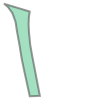

In [9]:
x = []
y = []

x.append(x_lists[13][::-1])
y.append(y_lists[13][::-1])

x.append(x_lists[26][2:][::-1])
y.append(y_lists[26][2:][::-1])

x.append([(x_lists[2][-1]*0.6+x_lists[2][0]*0.4),x_lists[2][0]][::-1])
y.append([(y_lists[2][-1]*0.6+y_lists[2][0]*0.4),y_lists[2][0]][::-1])

x.append(x_lists[11][::-1])
y.append(y_lists[11][::-1])

xlist, ylist = (x,y)
# plotpolygon(xlist, ylist)

outmidleftdown = Polygon(np.array([[e for x in xlist for e in x], [e for x in ylist for e in x]]).T)
outmidleftdown

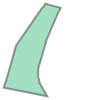

In [10]:
x = []
y = []

x.append(x_lists[25])
y.append(y_lists[25])

x.append([(x_lists[31][-1]+x_lists[31][0])/2,x_lists[31][0]])
y.append([(y_lists[31][-1]+y_lists[31][0])/2,y_lists[31][0]])

x.append(x_lists[24])
y.append(y_lists[24])

xlist, ylist = (x,y)
# plotpolygon(xlist, ylist)

outmidleftup = Polygon(np.array([[e for x in xlist for e in x], [e for x in ylist for e in x]]).T)
outmidleftup

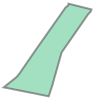

In [11]:
x = []
y = []

x.append(x_lists[28])
y.append(y_lists[28])

x.append([(x_lists[31][-1]+x_lists[31][0])/2,x_lists[31][-1]][::-1])
y.append([(y_lists[31][-1]+y_lists[31][0])/2,y_lists[31][-1]][::-1])

x.append(x_lists[25][::-1])
y.append(y_lists[25][::-1])

xlist, ylist = (x,y)
# plotpolygon(xlist, ylist)

inmidleftup = Polygon(np.array([[e for x in xlist for e in x], [e for x in ylist for e in x]]).T)
inmidleftup

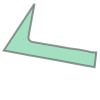

In [12]:
x = []
y = []

x.append(x_lists[10])
y.append(y_lists[10])

x.append(x_lists[0][:])
y.append(y_lists[0][:])

x.append([(x_lists[4][0]+x_lists[4][-1])/2,x_lists[4][0]])
y.append([(y_lists[4][0]+y_lists[4][-1])/2,y_lists[4][0]])

x.append(x_lists[9][1:])
y.append(y_lists[9][1:])

xlist, ylist = (x,y)
# plotpolygon(xlist, ylist)

outleft = Polygon(np.array([[e for x in xlist for e in x], [e for x in ylist for e in x]]).T)
outleft

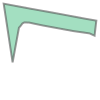

In [13]:
x = []
y = []

x.append(x_lists[10])
y.append(y_lists[10])

x.append(x_lists[0][:])
y.append(y_lists[0][:])

x.append([(x_lists[4][0]+x_lists[4][-1])/2,x_lists[4][-1]])
y.append([(y_lists[4][0]+y_lists[4][-1])/2,y_lists[4][-1]])

x.append(x_lists[30][::-1])
y.append(y_lists[30][::-1])

xlist, ylist = (x,y)
# plotpolygon(xlist, ylist)

inleft = Polygon(np.array([[e for x in xlist for e in x], [e for x in ylist for e in x]]).T)
inleft

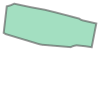

In [14]:
x = []
y = []

x.append(x_lists[5][1:][::-1])
y.append(y_lists[5][1:][::-1])

x.append(x_lists[21][::-1])
y.append(y_lists[21][::-1])

x.append(x_lists[15][3:5][::-1])
y.append(y_lists[15][3:5][::-1])

x.append(x_lists[2][:][::-1])
y.append(y_lists[2][:][::-1])

x.append(x_lists[4][:][::-1])
y.append(y_lists[4][:][::-1])

x.append(x_lists[27][2:][::-1])
y.append(y_lists[27][2:][::-1])

x.append(x_lists[31][:][::-1])
y.append(y_lists[31][:][::-1])

x.append(x_lists[7][:][::-1])
y.append(y_lists[7][:][::-1])

x.append(x_lists[6][8:])
y.append(y_lists[6][8:])

xlist, ylist = (x,y)
# plotpolygon(xlist, ylist)

inside = Polygon(np.array([[e for x in xlist for e in x], [e for x in ylist for e in x]]).T)
inside

In [ ]:
data_files = sorted(glob.glob(parent_dir + '/InputData/INTERACTION/DR_USA_Intersection_GL/*.h5'))

for data_file in tqdm(data_files):    
    data = pd.read_hdf(data_file, key='data')
    
    positions = np.empty(len(data)).astype(str)
    poses = np.empty(len(data))
    for poly, position, pos in zip([outmidright, inmidright, inmidleftdown, outmidleftdown, outmidleftup, inmidleftup, outleft, inleft, inside],
                                   ['out_midright', 'in_midright', 'in_midleftdown', 'out_midleftdown', 'out_midleftup', 'in_midleftup', 'out_left', 'in_left', 'inside'],
                                   [-1, 1, 1, -1, -1, 1, -1, 1, 0]):
        PointIn = data.apply(lambda x: Point(x[['x','y']].values).within(poly), axis=1).values
        positions[PointIn] = position
        poses[PointIn] = pos
    poses[(poses!=-1)&(poses!=1)&(poses!=0)] = 0
    positions[(poses!=-1)&(poses!=1)] = 'inside'
    data['position'] = positions
    data['pos'] = poses
    
    data.to_hdf(data_file, key='data')

  0%|          | 0/1 [00:00<?, ?it/s]

## Map figure maker

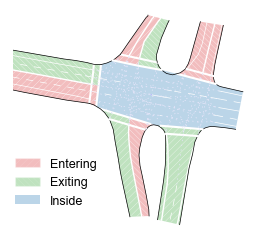

In [15]:
mpl.rc('hatch', color='w', linewidth=0.2)
def plot_polygon(ax, poly, **kwargs):
    path = Path.make_compound_path(
           Path(np.asarray(poly.exterior.coords)[:, :2]),
           *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])

    patch = PathPatch(path, **kwargs)
    collection = PatchCollection([patch], **kwargs)
    
    ax.add_collection(collection, autolim=True)
    return collection

E_min, E_max, N_min, N_max = [930.805-15, 1039.831+5, 958.158-25, 1027.282+10]
fig, ax = plt.subplots(figsize=(3,3))
lines = vs.draw_map(ax, 'DR_USA_Intersection_GL', xlim=[x_min-5, x_max+5], ylim=[y_min-5, y_max+5])
polygons = [outmidright, inmidright, inmidleftdown, outmidleftdown, outmidleftup, inmidleftup, outleft, inleft, inside]
colors = ['tab:green','tab:red','tab:red','tab:green','tab:green','tab:red','tab:green','tab:red','tab:blue']
hatches = ['/////','\\\\\\\\\\\\','\\\\\\\\\\\\','/////','\\\\\\\\\\\\','/////','\\\\\\\\\\\\','/////',None]
for polygon,color,hatch in zip(polygons,colors,hatches):
    plot_polygon(ax, polygon, facecolor=color, edgecolor='none', alpha=0.3, lw=0.5, hatch=hatch, label='polygon')
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(E_min+21, E_max)
ax.set_ylim(N_min-3, N_max-5)
ax.set_aspect('equal')
ax.set_axis_off()
handles = [Patch(color='tab:red', alpha=0.3, hatch='/////', ec='w'), 
           Patch(color='tab:green', alpha=0.3, hatch='\\\\\\\\\\\\', ec='w'), 
           Patch(color='tab:blue', alpha=0.3, ec='none')]
ax.legend(handles, ['Entering', 'Exiting', 'Inside'], loc='lower left', bbox_to_anchor=(-0.04, 0.05), frameon=False, fontsize=9)

# for i in range(len(x_lists)):
    # plt.plot(x_lists[i], y_lists[i], lw=2)
    # plt.text(x_lists[i][1], y_lists[i][1], str(i))
# plt.scatter(data.x, data.y, c=poses, s=1)

In [16]:
figure_path = r'C:/SURFdrive/PhD progress/PhDResearch/1_DriverSpaceInference/Journal paper/Figures/'
fig.savefig(figure_path + 'GL_map.pdf', bbox_inches='tight', dpi=600)

In [57]:
(N_max-10-(N_min+15))/(E_max-(E_min+20))*3

2.1772054372351537

## Load data

In [12]:
data_files = sorted(glob.glob(parent_dir + '/InputData/INTERACTION/DR_USA_Intersection_GL/*.h5'))

data = []
for data_file in tqdm(data_files):
    df = pd.read_hdf(data_file, key='data', mode='r+')
    file_id = int(data_file[-6:-3])
    df['file_id'] = file_id
    df['frame_id'] = (file_id * 1e4 + df['frame_id']).astype(int)
    df['track_id'] = (file_id * 1e3 + df['track_id']).astype(int)
    df['unique_id'] = (df['track_id'] * 1e4 + df['frame_id'] % 1e4).astype(int)
    data.append(df)
data = pd.concat(data)

data = data.reset_index()
data = data.dropna()

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████| 60/60 [01:16<00:00,  1.28s/it]


In [13]:
print('There are {} vehicles'.format(len(data.track_id.drop_duplicates())))
print('{:.2f} hours of data is recorded'.format(len(data.frame_id.drop_duplicates())/10/60/60))
print('The distance range is {:.2f} m'.format(data.x.max() - data.x.min()))

There are 10510 vehicles
4.34 hours of data is recorded
The distance range is 109.03 m


## Sampling

In [14]:
# correct heading directions
data.loc[np.sign(data.vx)*np.sign(data.hx)==-1, 'hx'] = -data[np.sign(data.vx)*np.sign(data.hx)==-1].hx
data.loc[np.sign(data.vy)*np.sign(data.hy)==-1, 'hy'] = -data[np.sign(data.vy)*np.sign(data.hy)==-1].hy

In [15]:
pair_idx = data.groupby('frame_id').apply(lambda x : pd.DataFrame.from_records(combinations(x.unique_id, 2)))

pairs = pd.DataFrame({'frame_id':pair_idx.index.get_level_values(0).astype(int), 'i':(pair_idx[0]//1e4).astype(int), 'j':(pair_idx[1]//1e4).astype(int)})
pairs['file_id'] = data.reindex(index=pair_idx[0].values)['file_id'].values
pairs[['x_i','y_i','vx_i','vy_i','hx_i','hy_i','length_i','width_i','pos_i']] = data.set_index('unique_id').reindex(index=pair_idx[0].values)[['x','y','vx','vy','hx','hy','length','width','pos']].values
pairs[['x_j','y_j','vx_j','vy_j','hx_j','hy_j','length_j','width_j','pos_j']] = data.set_index('unique_id').reindex(index=pair_idx[1].values)[['x','y','vx','vy','hx','hy','length','width','pos']].values
pairs = pairs[(pairs.pos_i*pairs.pos_j)>-0.5] # vehicles in the entering lane cannot interact with vehicles in the exit lane
data = []

dvx = pairs['vx_i']-pairs['vx_j']
dvy = pairs['vy_i']-pairs['vy_j']
pairs = pairs[(dvx!=0)|(dvy!=0)] # proximity resistance cannot be computed for two vehicles with a relative velocity of (0,0)
pairs['x'] = dvy/np.sqrt(dvx**2+dvy**2)*(pairs.x_j-pairs.x_i)-dvx/np.sqrt(dvx**2+dvy**2)*(pairs.y_j-pairs.y_i)
pairs['y'] = dvx/np.sqrt(dvx**2+dvy**2)*(pairs.x_j-pairs.x_i)+dvy/np.sqrt(dvx**2+dvy**2)*(pairs.y_j-pairs.y_i)
pairs['v'] = np.sqrt(dvx**2 + dvy**2)
pairs['vi'] = np.sqrt(pairs.vx_i**2+pairs.vy_i**2)
pairs['vj'] = np.sqrt(pairs.vx_j**2+pairs.vy_j**2)

pairs = pairs[(abs(pairs.x)<15)&(abs(pairs.y)<100)]

# remove overlapping (<0.5m) vehicles
remove_list = pairs[(pairs.x**2+pairs.y**2)<0.25].j.drop_duplicates().values
pairs = pairs[(~np.isin(pairs.j, remove_list))&(~np.isin(pairs.i, remove_list))]

# with or without lateral interaction
canglev = angle(pairs.hx_i, pairs.hy_i, pairs.hx_j, pairs.hy_j)
cangle = np.empty(canglev.shape)
cangle[abs(canglev)<5] = 0
cangle[abs(canglev)>175] = 0
cangle[(canglev<=175)&(canglev>=5)] = 1
cangle[(canglev>=-175)&(canglev<=-5)] = 1
pairs['cangle'] = cangle
pairs['cangle_deg'] = canglev

pairs = pairs.reset_index(drop=True)[['x','y','v','vi','vj','cangle','cangle_deg']]
pairs.to_hdf(parent_dir + '/OutputData/DriverSpace/pNEUMA/SurroundingSampling/IntersectionGL/samples_GL.h5', key='samples')

## Grouping

In [16]:
samples = []
for cangle, vehnum in zip([0,1], [8000, 25000]):
    sample = pairs[(pairs.cangle==cangle)&(pairs.v<=20)]
    sample = sample.sort_values(by='v')
    sample['round_v'] = np.round(sample['v'],1)
    groups = sample.groupby('round_v').x.count()
    threshold = groups[groups>=vehnum].index[-1]
    sample1 = []
    for roundv in sample[sample.round_v<=threshold].round_v.unique():
        samp = sample[sample.round_v==roundv]
        if len(samp)>vehnum:
            samp = samp.loc[np.random.choice(samp.index.values, vehnum)]
        sample1.append(samp)
    sample1 = pd.concat(sample1, axis=0)
    sample2 = sample[sample.round_v>threshold].copy()
    sample2['round_v'] = np.arange(len(sample2))//vehnum
    sample2['round_v'] = (np.round(sample2.groupby('round_v').v.mean(),1)).reindex(sample2.round_v).values
    sample = pd.concat((sample1, sample2))
    print('---- '+str(len(sample.round_v.unique()))+' ----')
    samples.append(sample)
samples = pd.concat(samples)
samples[['x','y','v','round_v','cangle']].to_hdf(parent_dir + '/OutputData/DriverSpace/pNEUMA/SurroundingSampling/IntersectionGL/samples_toinfer_GL.h5', key='samples')

---- 86 ----
---- 121 ----
